In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df=pd.read_csv('D:\intern\ElectricCarData_Clean.csv')

In [26]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


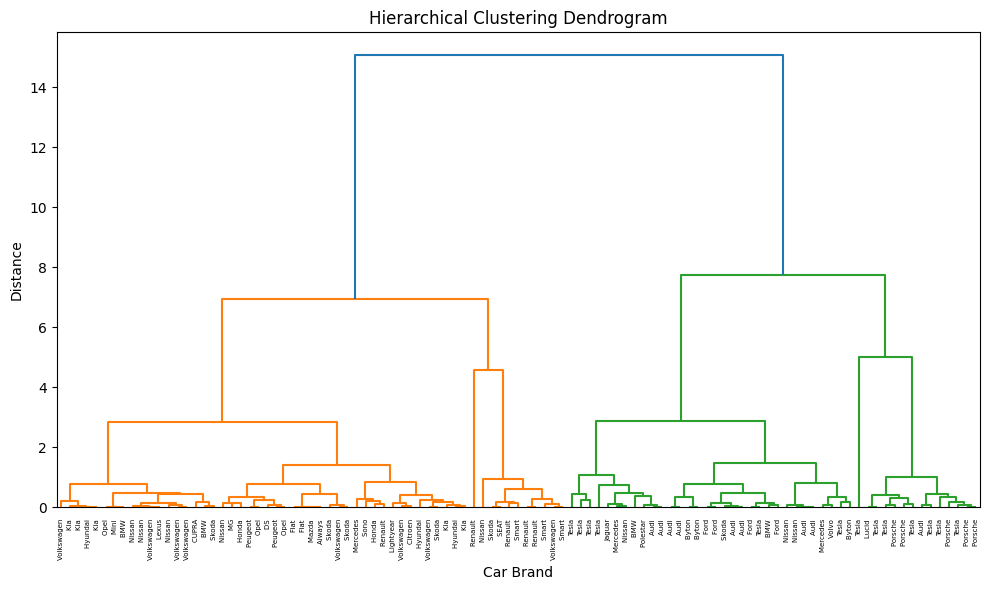

In [27]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Assuming df_clean contains the cleaned data with 'AccelSec' and 'TopSpeed_KmH'
X = df[['AccelSec', 'TopSpeed_KmH']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create linkage matrix
linked = sch.linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linked, labels=df['Brand'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car Brand')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [28]:
d2 = df.loc[:, ['AccelSec', 'TopSpeed_KmH', 'Brand']]

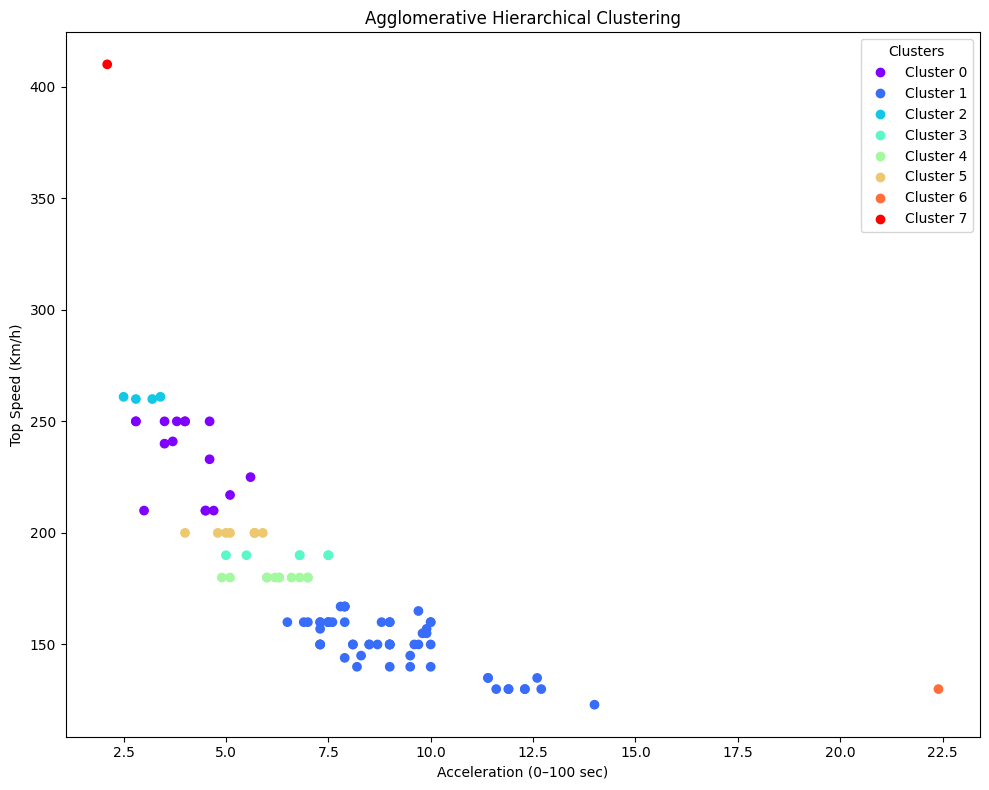

In [29]:
# 🔷 Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='single')
agglo_labels = agglo.fit_predict(d2[['AccelSec', 'TopSpeed_KmH']])  # 👈 Brand ko exclude karna zaroori hai

# 🔷 Plot Agglomerative Clusters
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(d2['AccelSec'], d2['TopSpeed_KmH'], c=agglo_labels, cmap='rainbow')

colors = scatter.cmap(scatter.norm(range(8)))
handles = [plt.Line2D([], [], marker='o', linestyle='', color=colors[i], label=f'Cluster {i}') for i in range(8)]
ax.legend(handles=handles, title='Clusters', loc='best', fontsize='medium')
ax.set_title('Agglomerative Hierarchical Clustering')
ax.set_xlabel('Acceleration (0–100 sec)')
ax.set_ylabel('Top Speed (Km/h)')
plt.tight_layout()
plt.show()

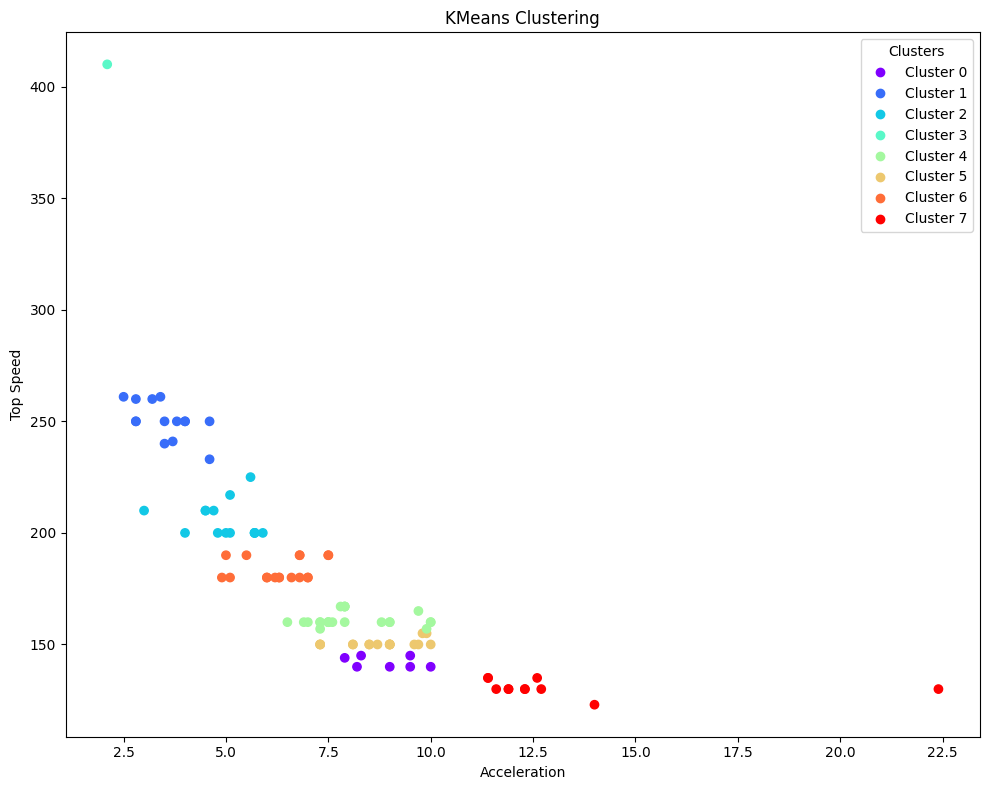

In [30]:
# 🔶 KMeans Clustering (k=8)
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(d2[['AccelSec', 'TopSpeed_KmH']])

# 🔶 Plot KMeans Clusters
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(d2['AccelSec'], d2['TopSpeed_KmH'], c=kmeans_labels, cmap='rainbow')

colors = scatter.cmap(scatter.norm(range(8)))
handles = [plt.Line2D([], [], marker='o', linestyle='', color=colors[i], label=f'Cluster {i}') for i in range(8)]
ax.legend(handles=handles, title='Clusters', loc='best', fontsize='medium')
ax.set_title('KMeans Clustering')
ax.set_xlabel('Acceleration')
ax.set_ylabel('Top Speed')
plt.tight_layout()
plt.show()

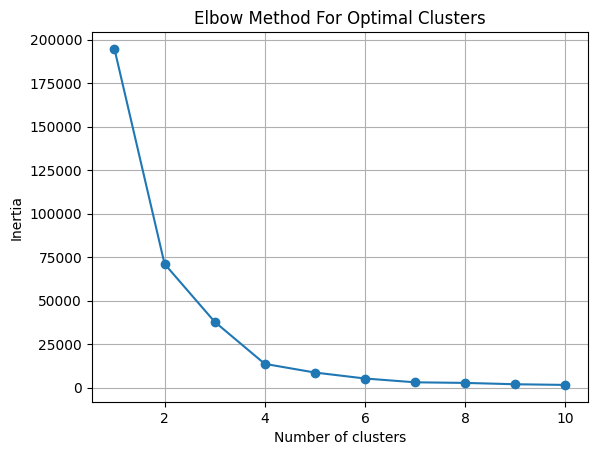

In [31]:
# 🔺 Elbow Method for Optimal Clusters
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(d2[['AccelSec', 'TopSpeed_KmH']])
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

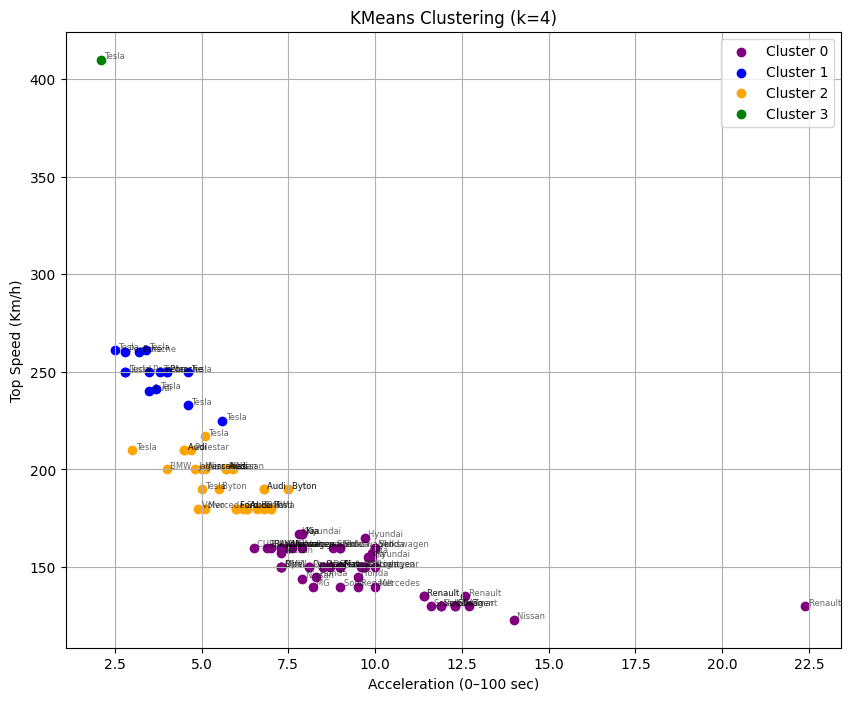

In [32]:
# 🔸 KMeans with Optimal Clusters (k=4)
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
kmeans_labels_optimal = kmeans_optimal.fit_predict(d2[['AccelSec', 'TopSpeed_KmH']])
d2['KMeans_4_Label'] = kmeans_labels_optimal

# 🔸 Plot Final KMeans Clustering with Brand Labels
plt.figure(figsize=(10, 8))
colors = ['purple', 'blue', 'orange', 'green']

for i in range(4):
    cluster = d2[d2['KMeans_4_Label'] == i]
    plt.scatter(cluster['AccelSec'], 
                cluster['TopSpeed_KmH'], 
                label=f'Cluster {i}', 
                c=colors[i])

# ✅ Add brand name to each point
for i in range(len(d2)):
    plt.text(d2.iloc[i]['AccelSec'] + 0.1, 
             d2.iloc[i]['TopSpeed_KmH'] + 0.5, 
             d2.iloc[i]['Brand'],  # 👈 Corrected here
             fontsize=6, 
             alpha=0.6)

plt.title('KMeans Clustering (k=4)')
plt.xlabel('Acceleration (0–100 sec)')
plt.ylabel('Top Speed (Km/h)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
d2.groupby('KMeans_4_Label')[['AccelSec', 'TopSpeed_KmH']].mean()


,AccelSec,TopSpeed_KmH
KMeans_4_Label,,
0,9.366667,149.807018
1,3.653333,248.733333
2,5.700000,192.566667
3,2.100000,410.000000


In [34]:
# -----------------------------------------------
# 🔍 UPDATED INSIGHTS FROM KMEANS CLUSTERING (k=4)
# -----------------------------------------------

# 🚗 Dataset Used:
# Electric car data with features: Acceleration (0–100 sec) and Top Speed (Km/h)

# 📊 Objective:
# Segment EVs into distinct performance clusters using KMeans Clustering 
# for better understanding of product positioning.

# ✅ Step Summary:
# - Optimal number of clusters (k=4) determined via the Elbow Method
# - KMeans applied on ['AccelSec', 'TopSpeed_KmH']
# - Scatter plot visualized with car brand labels

# -----------------------------------------------
# 🧠 CLUSTER INTERPRETATION:
# -----------------------------------------------

# 🟣 Cluster 0 (Purple):
# - Slow acceleration, low top speed
# - Mostly budget or city-focused electric cars
# - Brands: Renault, Hyundai, Volkswagen, etc.

# 🔵 Cluster 1 (Blue):
# - Fast acceleration and high top speed
# - Premium/performance EVs
# - Dominated by Tesla, Porsche, etc.

# 🟠 Cluster 2 (Orange):
# - Balanced performance (moderate acceleration and speed)
# - Mid-segment EVs balancing price and performance
# - Includes Audi, BMW, some Teslas

# 🟢 Cluster 3 (Green):
# - Outlier cluster with very high top speed
# - Likely represents a supercar
# - Tesla (possibly Roadster)

# -----------------------------------------------
# 📌 KEY INSIGHTS:
# -----------------------------------------------
# - EVs naturally group into performance tiers using clustering
# - Cluster 0: Entry-level, efficient city cars
# - Cluster 1: High-end, performance vehicles
# - Cluster 2: Versatile mid-range EVs
# - Cluster 3: Extreme-performance outlier
# - Useful for understanding competition and market segmentation

# -----------------------------------------------
# 📝 CONCLUSION:
# -----------------------------------------------
# KMeans clustering effectively identified hidden structures in EV performance data.
# This insight supports strategic decisions in product design, marketing, and pricing.

# End of Insights 🧾
